In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
glass_data=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\KNN\glass.csv")
glass_data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [5]:
# Spliting the data
x=glass_data.iloc[:,:-1]
y=glass_data['Type']

# finding the best value for k

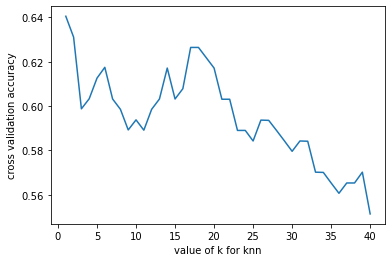

In [16]:
# chose the value beetwen 1 to 41
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,41)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_score.append(scores.mean())
# ploting
plt.plot(k_range,k_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross validation accuracy")
plt.show()

from the above graph it is clear that acuuracy is good at k=1 around 64%

# Model Building

In [17]:
kfold=KFold(n_splits=5)

In [18]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [19]:
result=cross_val_score(model,x,y,cv=kfold)
result

array([0.44186047, 0.46511628, 0.44186047, 0.41860465, 0.0952381 ])

In [22]:
from sklearn import metrics
print("accuracy----->",metrics.accuracy_score(y,model.predict(x)))

accuracy-----> 1.0


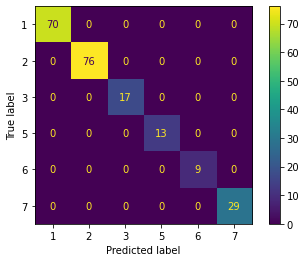

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x,y)

# Conclusion
Since the dataset is very small, training doesnt make much sense.
The result values are too good. Its a overfitted model
Unseen data can generate wrong values in this data since its very much overfitted.